<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/Conda_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/https-deeplearning-ai/MLEP-public.git

Cloning into 'MLEP-public'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 221 (delta 55), reused 44 (delta 44), pack-reused 156
Receiving objects: 100% (221/221), 14.99 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [ ]:
cd MLEP-public/course1/week1-ungraded-lab/

/content/MLEP-public/course1/week1-ungraded-lab


In [ ]:
ls

assets/  client.ipynb*  images/  README.md*  requirements.txt  server.ipynb*


### install conda colab

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


### check conda version

In [ ]:
!conda --version

conda 4.9.2


In [ ]:
!which conda

/usr/local/bin/conda


### use Conda to make virtual envinroment

In [ ]:
!conda create --name mlep-w1-lab python=3.7

Solving environment: \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local/envs/mlep-w1-lab

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    libgcc-ng-9.3.0            |      h2828fa1_19         7.8 MB  conda-forge
    libgomp-9.3.0              |      h2828fa1_19         376 KB  conda-forge
    libstdcxx-ng-9.3.0         |      h6de172a_19         4.0 MB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    pip-21.1.2                 |     pyhd8ed1ab_0         1.1 

In [ ]:
!conda activate mlep-w1-lab


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




### installing dependencies using PIP

In [ ]:
!pip install -r requirements.txt

### Launching Lab

#### Deploying a Machine Learning Model
1. Inspect the image data set used for object detection
2. Take a look at the model itself
3. Deploy the model using fastAPI



#### Object Detection with YOLOV3

In [ ]:
from IPython.display import Image, display

In [ ]:
cd MLEP-public/course1/week1-ungraded-lab/


Displaying image: apple.jpg


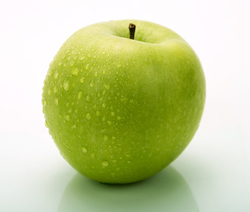


Displaying image: clock.jpg


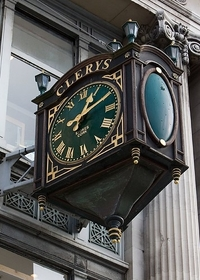


Displaying image: oranges.jpg


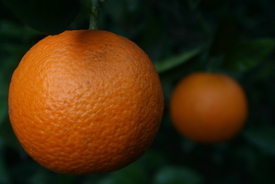


Displaying image: car.jpg


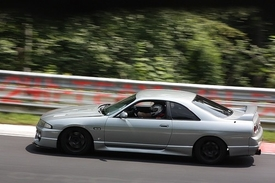

In [ ]:
# Some example images
image_files = ['apple.jpg',
'clock.jpg',
'oranges.jpg',
'car.jpg']

for image_file in image_files:
  print(f"\nDisplaying image: {image_file}")
  display(Image(filename=f"images/{image_file}"))

#### Overview of the model


*   using cvlib: use detect common objects fucntion
*   bbox: list containing bouding box coordiates for detected objects
* label: list of labels for detected objects.
* conf: list of confidence scores for detected objects.



### Creating the detect and draw box fucntion

In [ ]:
import os

dir_name = "images_with_boxes"
if not os.path.exists(dir_name):
  os.mkdir(dir_name)

In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox


def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """Detects common objects on an image and creates a new image with bounding boxes.

    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """
    
    # Images are stored under the images/ directory
    img_filepath = f'images/{filename}'
    
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
    
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    
    # Print current image's filename
    print(f"========================\nImage processed: {filename}\n")
    
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'images_with_boxes/{filename}', output_image)
    
    # Display the image with bounding boxes
    display(Image(f'images_with_boxes/{filename}'))

Try out the example images

Image processed: apple.jpg

Detected object: apple with confidence level of 0.5717206597328186



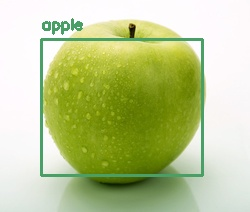

Image processed: clock.jpg

Detected object: clock with confidence level of 0.9683184623718262



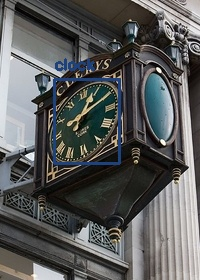

Image processed: oranges.jpg

Detected object: orange with confidence level of 0.6185588836669922

Detected object: orange with confidence level of 0.5561690330505371



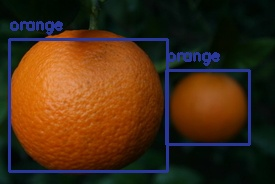

Image processed: car.jpg

Detected object: car with confidence level of 0.6325406432151794



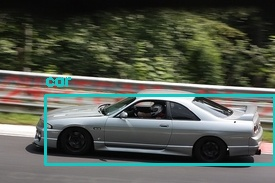

In [ ]:
for image_file in image_files:
  detect_and_draw_box(image_file)

Try out on more difficult image

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818482041358948

Detected object: orange with confidence level of 0.5346484184265137

Detected object: orange with confidence level of 0.515099287033081



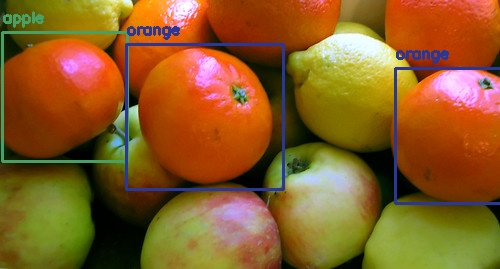

In [ ]:
detect_and_draw_box("fruits.jpg")

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818482041358948

Detected object: orange with confidence level of 0.5346484184265137

Detected object: orange with confidence level of 0.515099287033081

Detected object: apple with confidence level of 0.34759870171546936

Detected object: orange with confidence level of 0.32876086235046387

Detected object: apple with confidence level of 0.31244686245918274

Detected object: orange with confidence level of 0.27986079454421997

Detected object: orange with confidence level of 0.2749977707862854

Detected object: apple with confidence level of 0.2744504511356354

Detected object: orange with confidence level of 0.21419058740139008



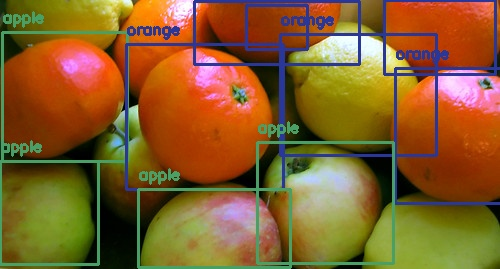

In [ ]:
detect_and_draw_box("fruits.jpg", confidence=0.2)

####Deploying the model using fastAPI

#### placing your object detection model in a server

In [ ]:
dir_name = "images_uploaded"
if not os.path.exists(dir_name):
  os.mkdir(dir_name)

#### Some concept clarifications
* Client-Server model
- Put all the software required for predicting in a server.
- A Client can interact with the model by sending requests to the server
- ML model lives in server waiting clients to submit prediction requests. 
The client should provide use the information provided to return prediction to the client, who can the use them at their leisure.
an FastAPI class is used
uvicorn.run(app) is a serving, which is a really fast Asynchronous Server Gateway Interface (ASGI) implementation. 
* Endpoints
each endpoint to each model
* Decorating it with a function that contains information on the HTTP method allowed (more on this next) and the pattern in the URL that it will use.

### Why fastAPI?
With fastAPI you can create web servers to host your models very easily. Additionally, this platform is extremely fast and it has a built-in client that can be used to interact with the server. To use it you will need to visit the "/docs" endpoint, for this case this means to visit http://localhost:8000/docs. Isn't that convenient?

In [ ]:
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [ ]:
# Assign an instance of the FastAPI class to the variable "app".
# You will interact with your api using this instance.
app = FastAPI(title='Deploying a ML Model with FastAPI')

# List available models using Enum for convenience. This is useful when the options are pre-defined.
class Model(str, Enum):
    yolov3tiny = "yolov3-tiny"
    yolov3 = "yolov3"


# By using @app.get("/") you are allowing the GET method to work for the / endpoint.
@app.get("/")
def home():
    return "Congratulations! Your API is working as expected. Now head over to http://localhost:8000/docs."


# This endpoint handles all the logic necessary for the object detection to work.
# It requires the desired model and the image in which to perform object detection.
@app.post("/predict") 
def prediction(model: Model, file: UploadFile = File(...)):

    # 1. VALIDATE INPUT FILE
    filename = file.filename
    fileExtension = filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not fileExtension:
        raise HTTPException(status_code=415, detail="Unsupported file provided.")
    
    # 2. TRANSFORM RAW IMAGE INTO CV2 image
    
    # Read image as a stream of bytes
    image_stream = io.BytesIO(file.file.read())
    
    # Start the stream from the beginning (position zero)
    image_stream.seek(0)
    
    # Write the stream of bytes into a numpy array
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    
    # Decode the numpy array as an image
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    
    
    # 3. RUN OBJECT DETECTION MODEL
    
    # Run object detection
    bbox, label, conf = cv.detect_common_objects(image, model=model)
    
    # Create image that includes bounding boxes and labels
    output_image = draw_bbox(image, bbox, label, conf)
    
    # Save it in a folder within the server
    cv2.imwrite(f'images_uploaded/{filename}', output_image)
    
    
    # 4. STREAM THE RESPONSE BACK TO THE CLIENT
    
    # Open the saved image for reading in binary mode
    file_image = open(f'images_uploaded/{filename}', mode="rb")
    
    # Return the image as a stream specifying media type
    return StreamingResponse(file_image, media_type="image/jpeg")

spin up the server!

In [ ]:
# Allows the server to be run in this interactive environment
nest_asyncio.apply()

# Host depends on the setup you selected (docker or virtual env)
host = "0.0.0.0" if os.getenv("DOCKER-SETUP") else "127.0.0.1"

# Spin up the server!    
uvicorn.run(app, host=host, port=8888)

INFO:     Started server process [1773]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8888 (Press CTRL+C to quit)
